## Concept

* A stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time.
* parameters such as mean and variance also do not change over time. 
* Strict (all stats dont change), weak (mean, var, corr)

## Why stationarity
* Stationary processes are easier to analyze.
* Most forecasting algorithms assume a series is stationary.

## ADF Test

* Null Hyp -> not stationary, Alt Hyp -> stationary
* pval > 0.05 -> null is valid -> not stationary

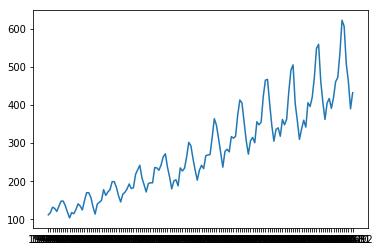

In [7]:
# airline data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'data/airline.csv', index_col = 'Month')
plt.plot(df['Passengers'])
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
# Observation : pvalue > 0.05 -> non stationary

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


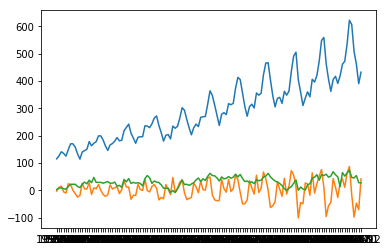

In [9]:
# First and second order difference
df['Passengers_Diff1'] = df['Passengers'].diff()
df['Passengers_Diff12'] = df['Passengers'].diff(12)

# Don't forget to drop missing values
df = df.dropna()

plt.plot(df['Passengers'])
plt.plot(df['Passengers_Diff1'])
plt.plot(df['Passengers_Diff12'])
plt.show()

In [10]:
result = adfuller(df['Passengers'])
result_1 = adfuller(df['Passengers_Diff1'])
result_12 = adfuller(df['Passengers_Diff12'])

print('p-value - original : %f' % result[1])
print('p-value - diff 1 : %f' % result_1[1])
print('p-value - diff 12 : %f' % result_12[1])

# Observation : 1st order diff dint make TS stationary but 12th order did

p-value - original : 0.989598
p-value - diff 1 : 0.081634
p-value - diff 12 : 0.011551


## automated function to find order

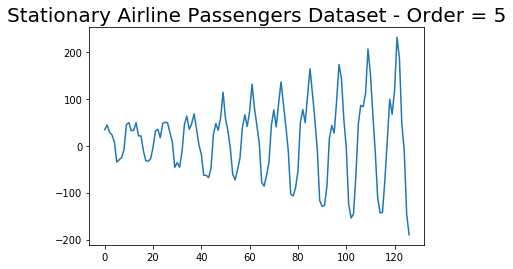

In [12]:
def make_stationary(data: pd.Series, alpha: float = 0.05, max_diff_order: int = 10) -> dict:
    import numpy as np
    # Test to see if the time series is already stationary
    if adfuller(data)[1] < alpha:
        return {
            'differencing_order': 0,
            'time_series': np.array(data)
        }
    
    # A list to store P-Values
    p_values = []
    
    # Test for differencing orders from 1 to max_diff_order (included)
    for i in range(1, max_diff_order + 1):
        # Perform ADF test
        result = adfuller(data.diff(i).dropna())
        # Append P-value
        p_values.append((i, result[1]))
        
    # Keep only those where P-value is lower than significance level
    significant = [p for p in p_values if p[1] < alpha]
    # Sort by the differencing order
    significant = sorted(significant, key=lambda x: x[0])
    
    # Get the differencing order
    diff_order = significant[0][0]
    
    # Make the time series stationary
    stationary_series = data.diff(diff_order).dropna()
    
    return {
        'differencing_order': diff_order,
        'time_series': np.array(stationary_series)
    }

ap_stationary = make_stationary(data=df['Passengers'])

plt.title(f"Stationary Airline Passengers Dataset - Order = {ap_stationary['differencing_order']}", size=20)
plt.plot(ap_stationary['time_series']);

## Summary:

* Stationary process is easier to analyze and is required by most forecasting models.
* Compares stats across different time intervals 
* ADF Test:
    * pvalue - prob value for it be in null hyp region
    * alpha - level that we set -> lower the value more stricter use case (like balloon burst for hot air balloon company) -> higher implies (party balloon company)